**HACKATHONS**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hackathon_data = pd.read_csv('../Preprocessed_files/cleaned_hackathons.csv')

**1. Heatmap: Correlation Between Numeric Variables**

C:\Users\Chetan Vemula\AppData\Local\Temp\ipykernel_13148\1430110803.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hackathon_data[['Applied', 'Impressions', 'Application Deadline']].corr(),


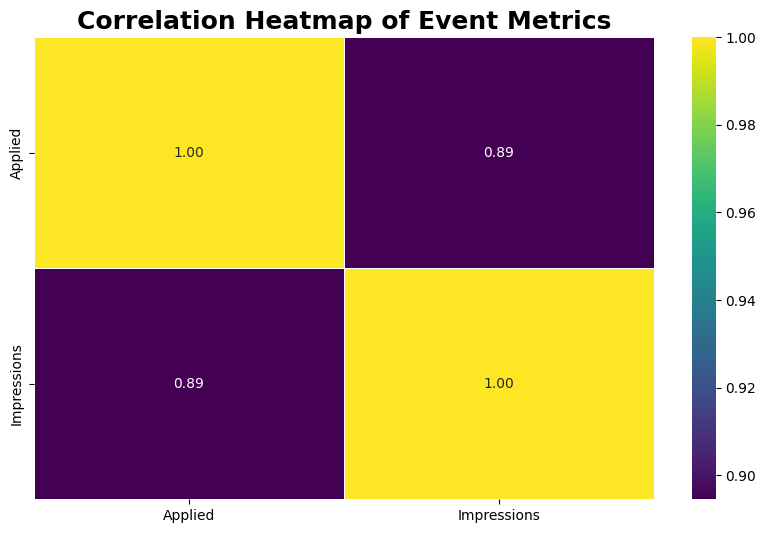

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    hackathon_data[['Applied', 'Impressions', 'Application Deadline']].corr(),
    annot=True, cmap='viridis', linewidths=0.5, fmt=".2f"
)
plt.title('Correlation Heatmap of Event Metrics', fontsize=18, fontweight='bold')
plt.show()


**2. Bar Chart: Most Active Organizations**

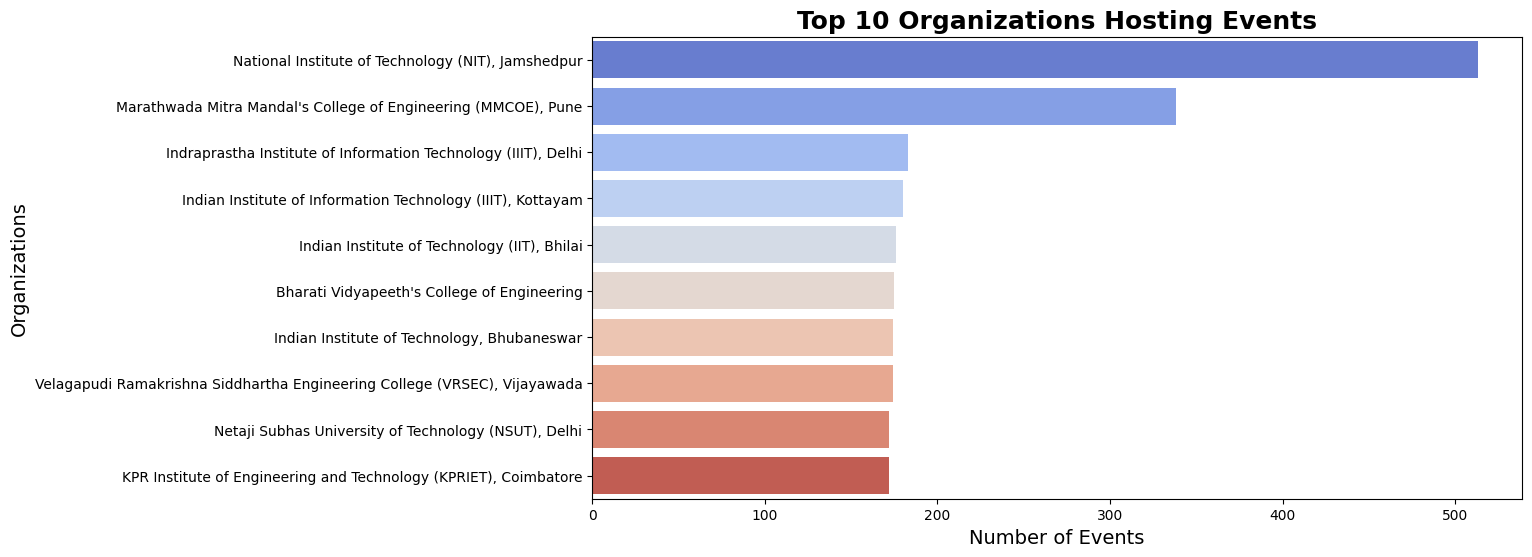

In [7]:
org_counts = hackathon_data['Organisations'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=org_counts.values, y=org_counts.index, palette='coolwarm')
plt.title('Top 10 Organizations Hosting Events', fontsize=18, fontweight='bold')
plt.xlabel('Number of Events', fontsize=14)
plt.ylabel('Organizations', fontsize=14)
plt.show()


**3. Treemap: Event Categories**

In [9]:
# Filter out excluded labels from the 'Category' column
excluded_labels = [
    "undergraduate", "engineering students", "postgraduate",
    "all", "mba students", "school students", "awards"
]

# Explode categories into individual labels, filter them, and count occurrences
category_counts = (
    hackathon_data['Category']
    .str.split(', ')
    .explode()
    .str.strip()
    .loc[lambda x: ~x.str.lower().isin(excluded_labels)]  # Exclude specified labels
    .value_counts()
)

# Create a DataFrame for visualization
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['Category', 'Count']

# Generate the treemap
import plotly.express as px
fig = px.treemap(
    category_counts_df,
    path=['Category'],
    values='Count',
    title='Event Category Distribution (Filtered)',
    color='Count',
    color_continuous_scale='Viridis'
)
fig.update_layout(title_font_size=22)
fig.show()


**4. Bubble Plot: Impressions vs Applications**


In [15]:
import plotly.express as px

# Ensure 'Application Deadline' is in datetime format
hackathon_data['Application Deadline'] = pd.to_datetime(hackathon_data['Application Deadline'], errors='coerce')

# Convert 'Application Deadline' to numeric days
hackathon_data['Application Deadline (days)'] = (hackathon_data['Application Deadline'] - hackathon_data['Application Deadline'].min()).dt.days

# Create a bubble plot with clear tooltips and styling
fig = px.scatter(
    hackathon_data,
    x="Impressions",
    y="Applied",
    size="Application Deadline (days)",
    color="Region",
    hover_name="Title",
    title="Impressions vs Applications (Bubble Plot by Region)",
    size_max=60,  # Set maximum bubble size for visibility
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Customize layout for clarity
fig.update_layout(
    title_font_size=22,
    xaxis_title="Impressions",
    yaxis_title="Applications",
    legend_title="Region",
    template="plotly_white"
)

# Add gridlines and interactivity
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor="lightgray")

# Display the plot
fig.show()


**5. Pie Chart: Online vs Offline Events**

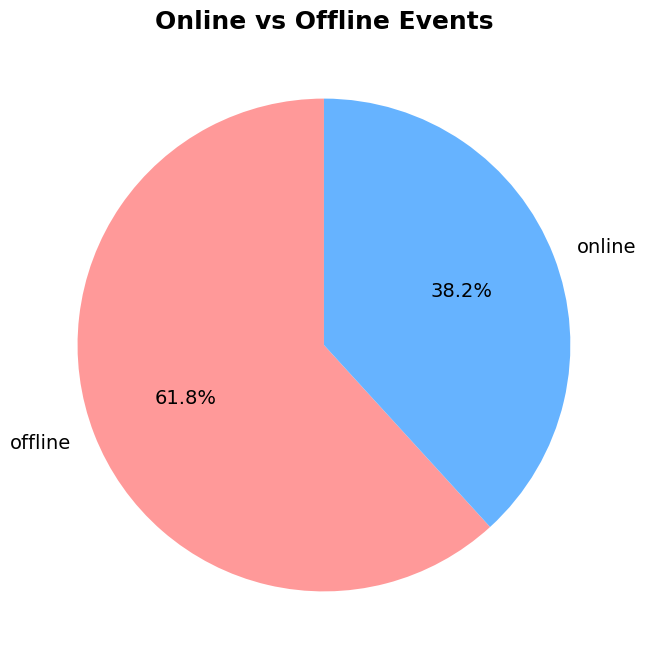

In [17]:
region_counts = hackathon_data['Region'].value_counts()

plt.figure(figsize=(8, 8))
region_counts.plot(
    kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'],
    startangle=90, textprops={'fontsize': 14}
)
plt.title('Online vs Offline Events', fontsize=18, fontweight='bold')
plt.ylabel('')  # Remove default y-axis label
plt.show()


**6. Word Cloud: Event Categories**

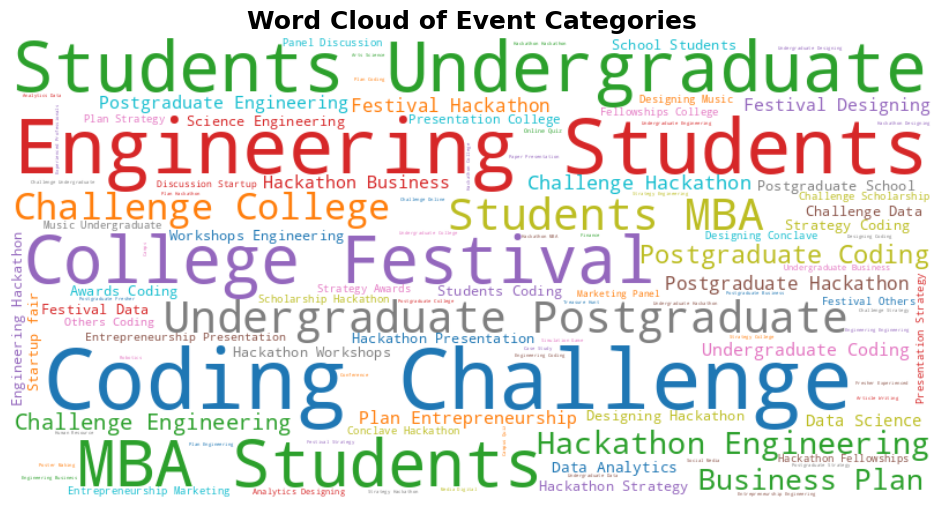

In [23]:
from wordcloud import WordCloud

text = " ".join(hackathon_data['Category'].dropna())
wordcloud = WordCloud(
    width=800, height=400, background_color='white',
    colormap='tab10', contour_width=1, contour_color='black'
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Event Categories', fontsize=18, fontweight='bold')
plt.show()


**7. Time Series: Events Over Time**

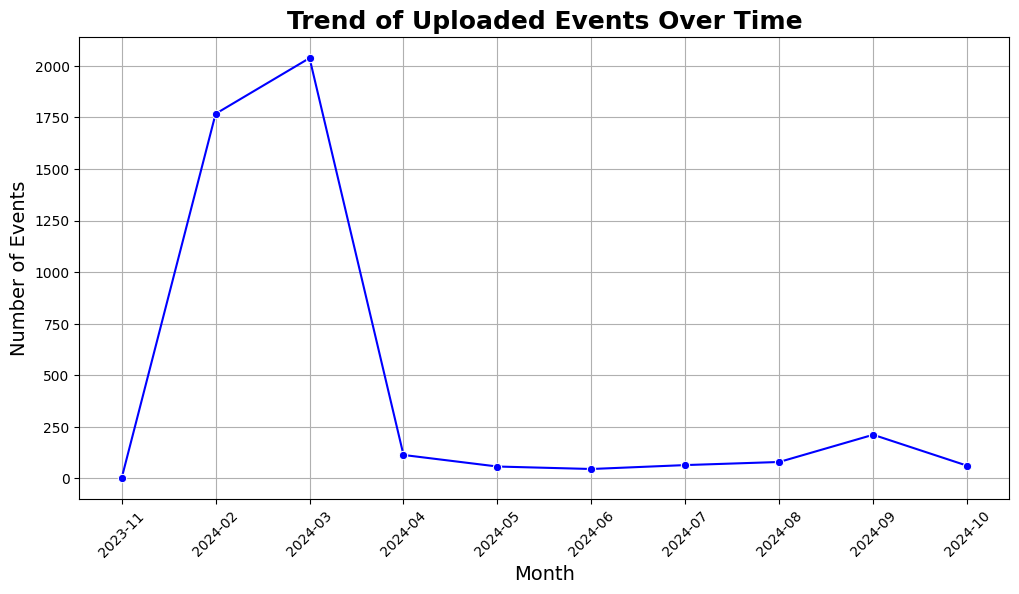

In [25]:
# Ensure 'Uploaded On' is in datetime format
hackathon_data['Uploaded On'] = pd.to_datetime(hackathon_data['Uploaded On'], errors='coerce')

monthly_counts = hackathon_data['Uploaded On'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='blue')
plt.title('Trend of Uploaded Events Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()


**8.3D Scatter Plot: Impressions vs Applications with Application Deadline**

In [30]:
import plotly.graph_objects as go

# Convert 'Application Deadline' to numeric days
hackathon_data['Application Deadline (days)'] = (hackathon_data['Application Deadline'] - hackathon_data['Application Deadline'].min()).dt.days

fig = go.Figure(
    data=go.Scatter3d(
        x=hackathon_data['Impressions'],
        y=hackathon_data['Applied'],
        z=hackathon_data['Application Deadline (days)'],
        mode='markers',
        marker=dict(
            size=10,
            color=hackathon_data['Application Deadline (days)'],  # Color by deadline
            colorscale='Viridis',
            opacity=0.8
        ),
        text=hackathon_data['Title']  # Hover info
    )
)
fig.update_layout(
    title="3D Scatter: Impressions vs Applications vs Deadline",
    scene=dict(
        xaxis_title='Impressions',
        yaxis_title='Applications',
        zaxis_title='Application Deadline (days)'
    ),
    template='plotly_white'
)
fig.show()


9. **Sunburst Chart: Hierarchical Breakdown of Categories and Regions**

In [32]:
fig = px.sunburst(
    hackathon_data,
    path=['Region', 'Category'],
    values='Impressions',
    color='Impressions',
    color_continuous_scale='Blues',
    title="Sunburst Chart: Event Categories by Region"
)
fig.update_layout(title_font_size=22)
fig.show()


**10.Heatmap of Application Trends Over Time**

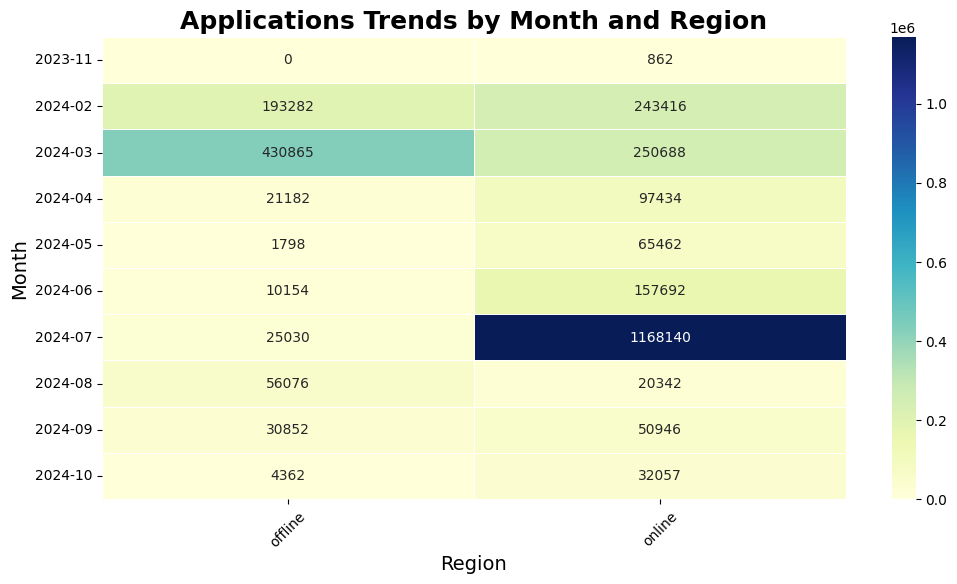

In [33]:
# Preprocessing for heatmap
hackathon_data['Uploaded Month'] = hackathon_data['Uploaded On'].dt.to_period('M')
heatmap_data = hackathon_data.groupby(['Uploaded Month', 'Region'])['Applied'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Applications Trends by Month and Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(rotation=45)
plt.show()


**JOBS**

In [34]:
pip install pandas matplotlib seaborn plotly

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [36]:
# Load data
job_data = pd.read_csv('../Preprocessed_files/cleaned_jobs.csv')

# Display the first few rows of the dataframe
print(job_data.head())

# Clean and preprocess data
job_data['Uploaded On'] = pd.to_datetime(job_data['Uploaded On'])
job_data['Impressions'] = pd.to_numeric(job_data['Impressions'], errors='coerce')
job_data['Applied'] = pd.to_numeric(job_data['Applied'], errors='coerce')
job_data.dropna(subset=['Company', 'Location', 'Opportunity Type'], inplace=True)

                          Position  \
0     Merchandise / Retail Planner   
1       Customer Success Executive   
2           Direct Sales Executive   
3  Customer Service Representative   
4                Operation Manager   

                                        Company Location  \
0                    Fashor Lifestyle Pvt. Ltd.  Unknown   
1                   Planet nextgen technologies  Unknown   
2    NTH Iconic Party Solutions Private Limited  Unknown   
3                      Career Comfort Solutions  Unknown   
4  Defitex Innovative Solutions Private Limited  Unknown   

                                                Link  \
0  https://unstop.com/jobs/merchandise-retail-pla...   
1  https://unstop.com/jobs/customer-success-execu...   
2  https://unstop.com/jobs/direct-sales-executive...   
3  https://unstop.com/jobs/customer-service-repre...   
4  https://unstop.com/jobs/operation-manager-defi...   

                 Uploaded On Opportunity Type Status  Applied  \
0  2024-

**Visualization 1: Job Opportunities by Company**

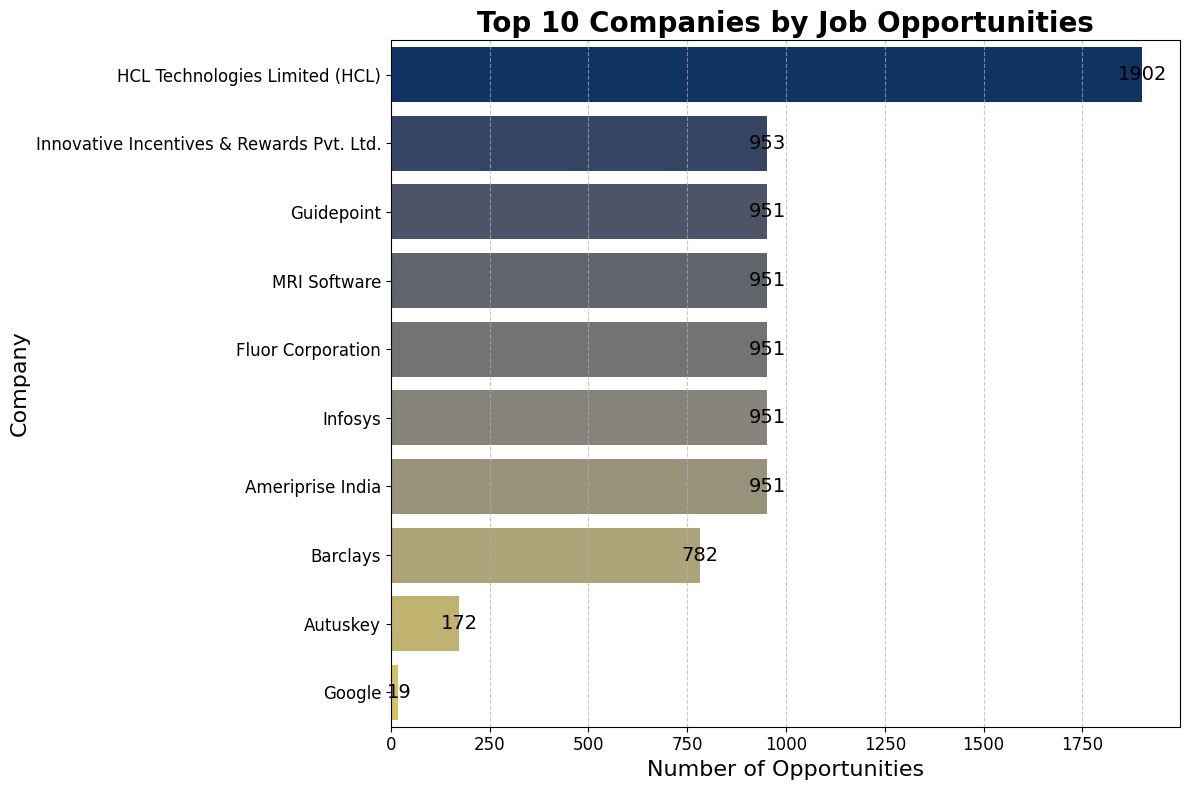

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the top 10 companies by number of opportunities
top_companies = job_data['Company'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='cividis')

# Add title and labels with refined font sizes
plt.title('Top 10 Companies by Job Opportunities', fontsize=20, fontweight='bold')
plt.xlabel('Number of Opportunities', fontsize=16)
plt.ylabel('Company', fontsize=16)

# Add the actual values on top of the bars for better clarity
for index, value in enumerate(top_companies.values):
    plt.text(value + 1, index, str(value), color='black', ha="center", va="center", fontsize=14)

# Adjust the ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display gridlines for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**2.Jobs by Location**

In [38]:
location_counts = job_data['Location'].value_counts().head(10)
fig = px.pie(values=location_counts.values, names=location_counts.index,
             title='Top 10 Locations for Job Opportunities',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**3. Eligibility Criteria Analysis**

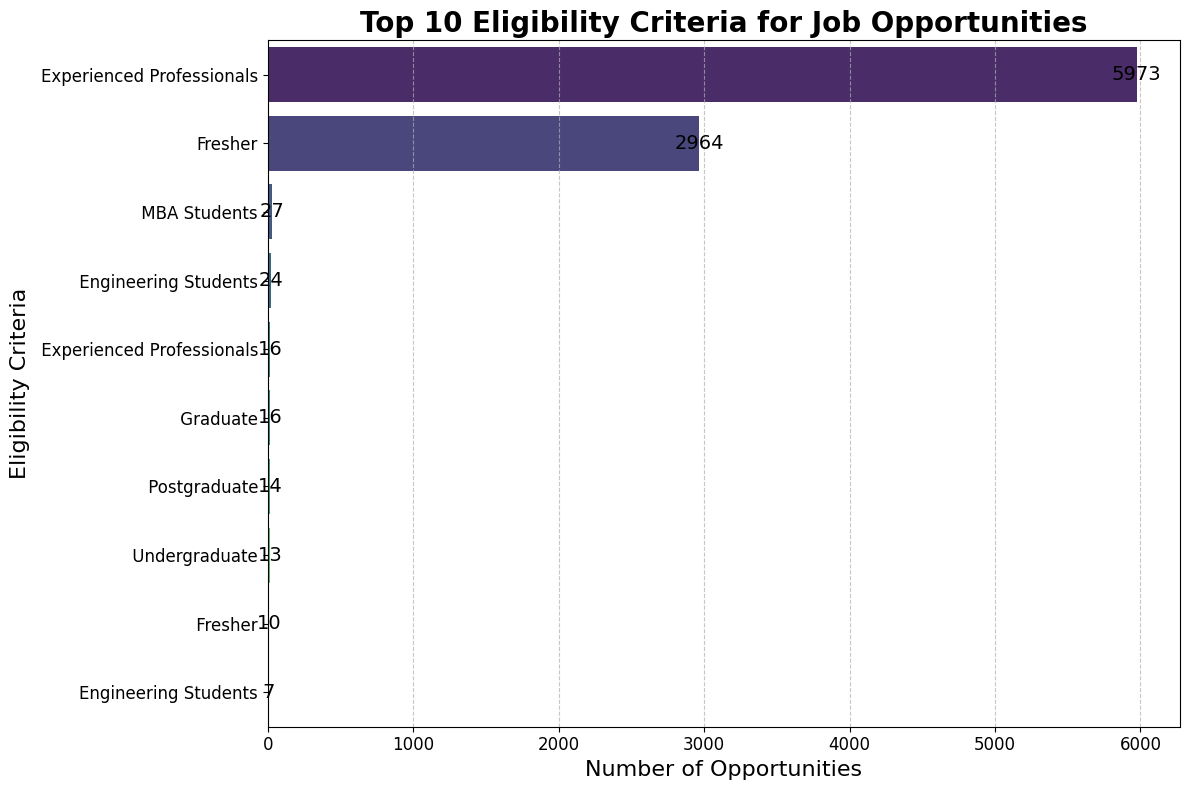

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 eligibility criteria by count
eligibility_counts = job_data['Eligibility'].str.split(',').explode().value_counts()
top_eligibility = eligibility_counts.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_eligibility.values, y=top_eligibility.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Eligibility Criteria for Job Opportunities', fontsize=20, fontweight='bold')
plt.xlabel('Number of Opportunities', fontsize=16)
plt.ylabel('Eligibility Criteria', fontsize=16)

# Annotate each bar with its value for clarity
for index, value in enumerate(top_eligibility.values):
    plt.text(value + 1, index, str(value), color='black', ha="center", va="center", fontsize=14)

# Adjust tick sizes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display gridlines for better comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**4. Job Status Distribution**

In [40]:
status_counts = job_data['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Create a donut chart using Plotly Express
fig = px.pie(status_counts,
             values='Count',
             names='Status',
             title='Job Status Distribution',
             hole=0.4,
             color_discrete_sequence=px.colors.sequential.Greens)

# Show the figure
fig.show()

**5.Sunburst Chart of Job Opportunities by Company and Status**

In [41]:
# Create a sunburst chart
fig = px.sunburst(job_data,
                  path=['Company', 'Status'],
                  values='Applied',
                  title='Sunburst Chart of Job Opportunities by Company and Status',
                  template='plotly_white')

# Show the figure
fig.show()

**6.Heatmap of Job Applications by Location and Opportunity Type**

In [42]:
import pandas as pd
import plotly.express as px

# Clean and preprocess data
job_data['Uploaded On'] = pd.to_datetime(job_data['Uploaded On'])
job_data['Application Deadline'] = pd.to_datetime(job_data['Application Deadline'], errors='coerce')
job_data['Impressions'] = pd.to_numeric(job_data['Impressions'], errors='coerce')
job_data['Applied'] = pd.to_numeric(job_data['Applied'], errors='coerce')

# Drop rows with NaN values in critical columns
job_data.dropna(subset=['Location', 'Opportunity Type', 'Applied'], inplace=True)

# Create a heatmap
heatmap_data = job_data.groupby(['Location', 'Opportunity Type'])['Applied'].sum().reset_index()
fig = px.density_heatmap(heatmap_data,
                         x='Location',
                         y='Opportunity Type',
                         z='Applied',
                         title='Heatmap of Job Applications by Location and Opportunity Type',
                         color_continuous_scale='Viridis')

# Update layout for better aesthetics
fig.update_layout(xaxis_title='Location',
                  yaxis_title='Opportunity Type',
                  template='plotly_white')

# Show the figure
fig.show()

**7.Treemap of Job Opportunities by Company and Opportunity Type**

In [43]:
import pandas as pd
import plotly.express as px
# Clean and preprocess data
job_data['Uploaded On'] = pd.to_datetime(job_data['Uploaded On'])
job_data['Application Deadline'] = pd.to_datetime(job_data['Application Deadline'], errors='coerce')
job_data['Impressions'] = pd.to_numeric(job_data['Impressions'], errors='coerce')
job_data['Applied'] = pd.to_numeric(job_data['Applied'], errors='coerce')

# Drop rows with NaN values in critical columns
job_data.dropna(subset=['Company', 'Opportunity Type', 'Applied'], inplace=True)

# Create a treemap of job opportunities by company and opportunity type
fig1 = px.treemap(job_data,
                  path=['Company', 'Opportunity Type'],
                  values='Applied',
                  title='Treemap of Job Opportunities by Company and Opportunity Type',
                  template='plotly_white')

# Show the figure
fig1.show()

**8.Word Cloud for Job Positions**

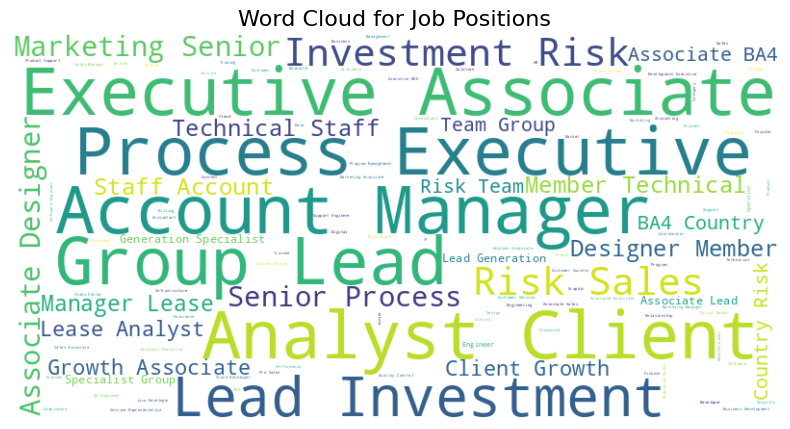

In [44]:
# Generate a word cloud for job positions
position_text = ' '.join(job_data['Position'].tolist())
wordcloud_positions = WordCloud(width=800, height=400, background_color='white').generate(position_text)

# Display the word cloud for job positions
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positions, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Job Positions', fontsize=16)
plt.show()

**9.Word Cloud for Companies**

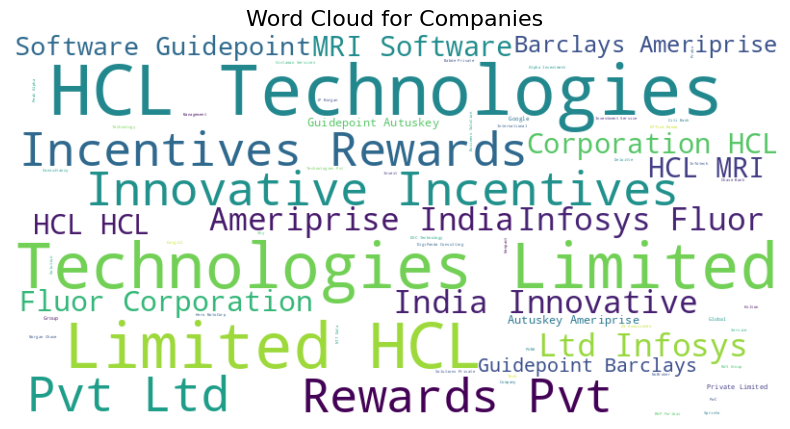

In [45]:
# Generate a word cloud for companies
company_text = ' '.join(job_data['Company'].tolist())
wordcloud_companies = WordCloud(width=800, height=400, background_color='white').generate(company_text)

# Display the word cloud for companies
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_companies, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Companies', fontsize=16)
plt.show()

**10.Word Cloud for eligibility criteria**

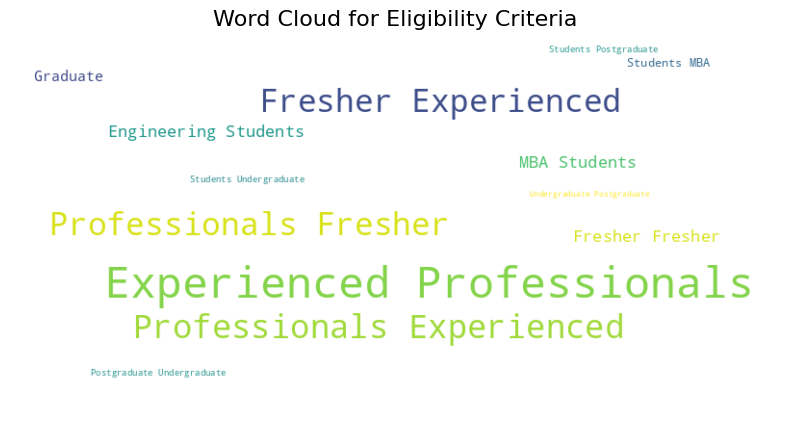

In [46]:
# Generate a word cloud for eligibility criteria
eligibility_text = ' '.join(job_data['Eligibility'].dropna().tolist())
wordcloud_eligibility = WordCloud(width=800, height=400, background_color='white').generate(eligibility_text)

# Display the word cloud for eligibility criteria
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_eligibility, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Eligibility Criteria', fontsize=16)
plt.show()

**INTERNSHIPS**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Load the dataset
internship_data = pd.read_csv("../Preprocessed_files/cleaned_internship.csv")

# Preprocessing steps
# Convert date columns to datetime format
internship_data['Uploaded On'] = pd.to_datetime(internship_data['Uploaded On'], errors='coerce')

# Drop unnecessary or empty columns
data_cleaned = internship_data.drop(columns=['Location', 'Link'])

# Check for missing values and handle them
# We'll drop rows with missing numerical values for simplicity
data_cleaned = data_cleaned.dropna(subset=['Impressions', 'Applied', 'Application Deadline'])

# Setting plot style
sns.set_theme(style="whitegrid", palette="muted")



***Visualization 1: Top 10 internship roles by impressions and applications***

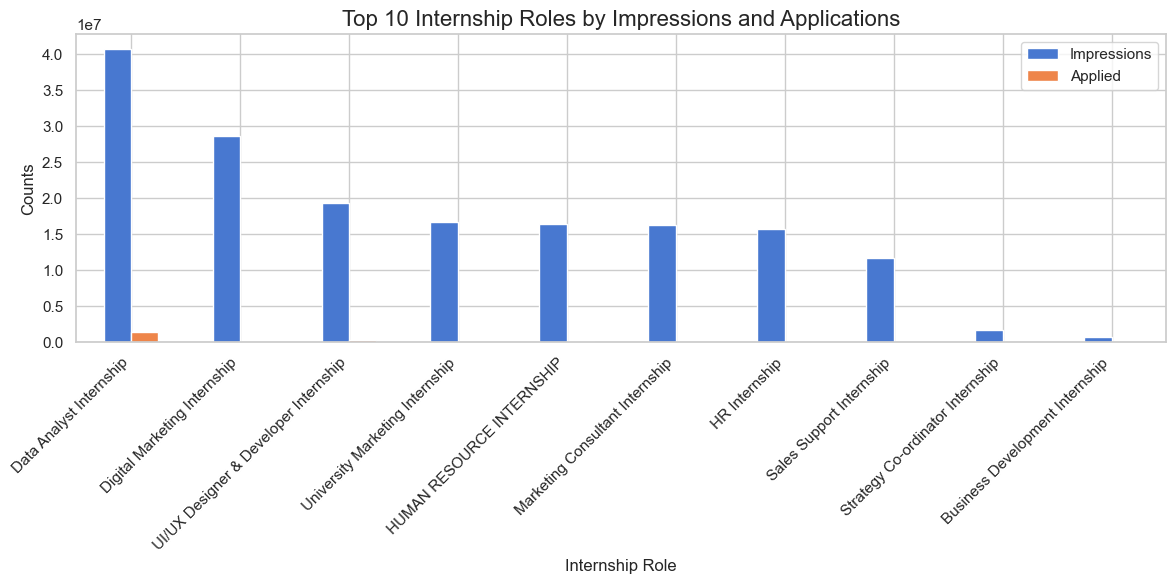

In [48]:
top_roles = data_cleaned.groupby('Position')[['Impressions', 'Applied']].sum().sort_values(by='Impressions', ascending=False).head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
top_roles.plot(kind='bar', ax=ax1)
plt.title('Top 10 Internship Roles by Impressions and Applications', fontsize=16)
plt.xlabel('Internship Role', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Visualization 2: Companies posting the most internships**

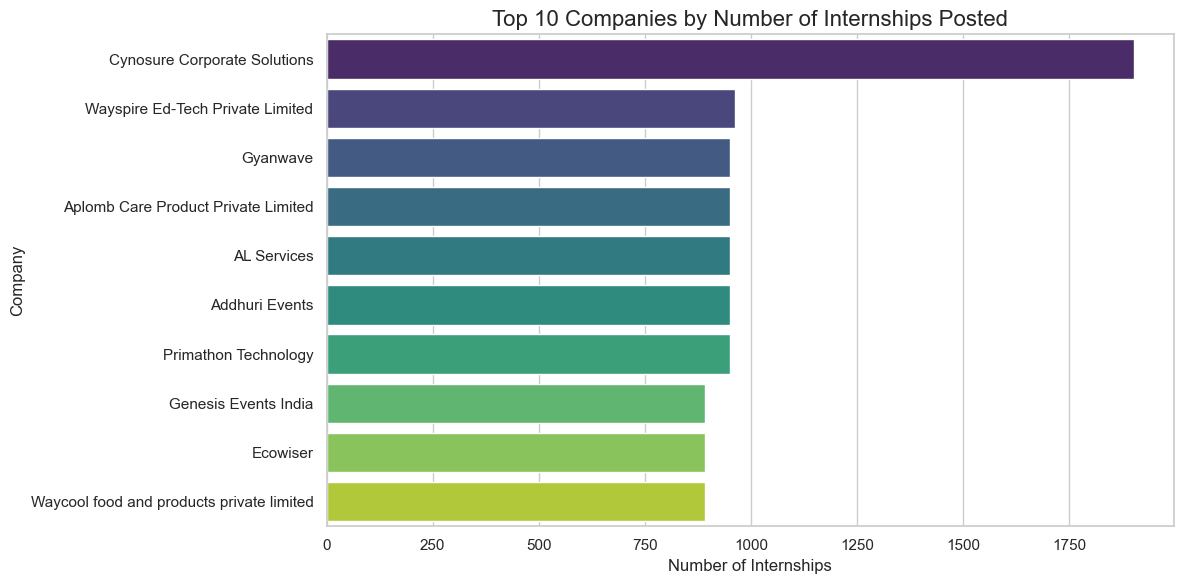

In [49]:
top_companies = data_cleaned['Company'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")
plt.title('Top 10 Companies by Number of Internships Posted', fontsize=16)
plt.xlabel('Number of Internships', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.tight_layout()
plt.show()

**Visualization 3: Status Breakdown**

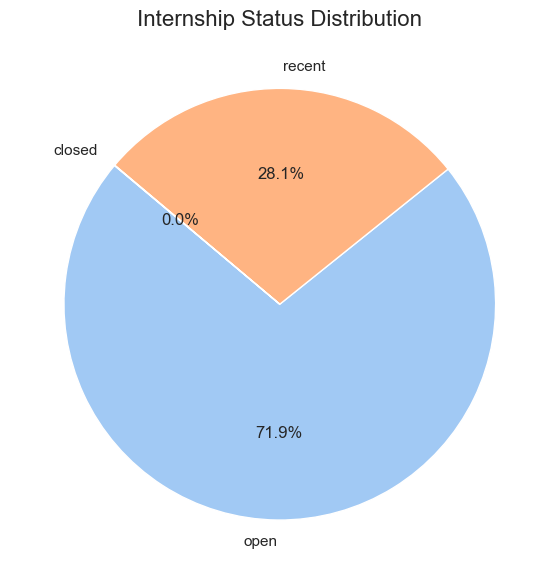

In [50]:
status_count = data_cleaned['Status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Internship Status Distribution', fontsize=16)
plt.tight_layout()
plt.show()

**Visualization 4 : Most common eligibility criteria**

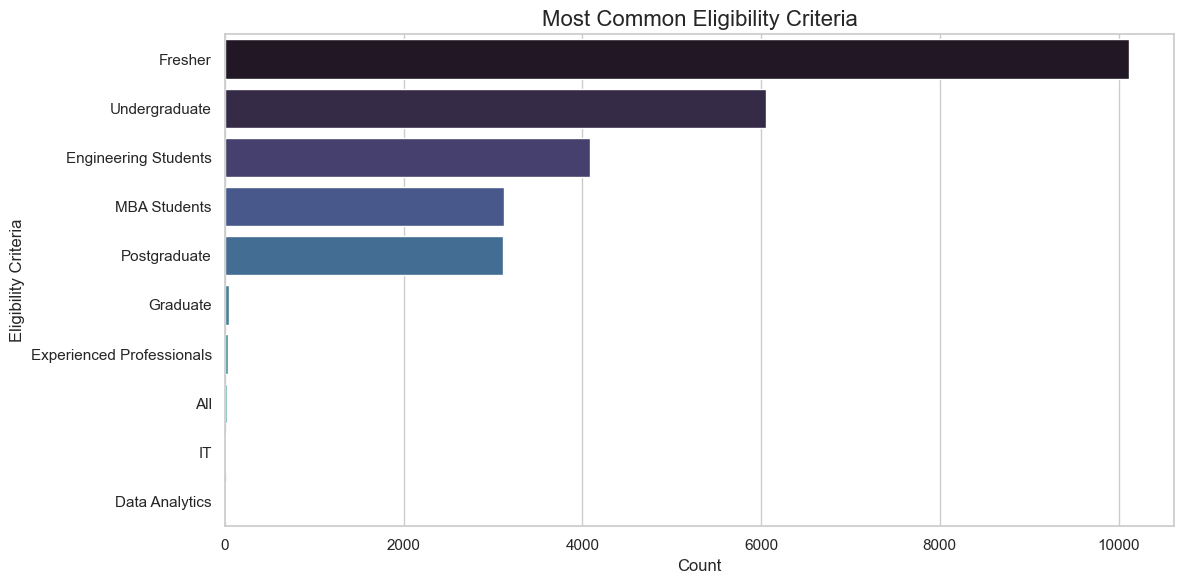

In [51]:
eligibility_split = data_cleaned['Eligibility'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(y=eligibility_split.index, x=eligibility_split.values, palette="mako")
plt.title('Most Common Eligibility Criteria', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Eligibility Criteria', fontsize=12)
plt.tight_layout()
plt.show()

**Visualization 5 : Heatmap for numerical columns**

C:\Users\Chetan Vemula\AppData\Local\Temp\ipykernel_13148\2002122827.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



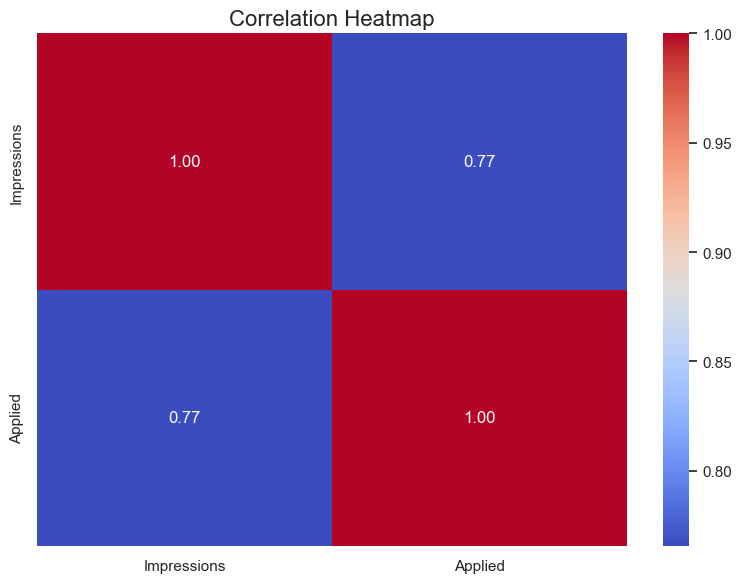

In [52]:
numerical_cols = data_cleaned[['Impressions', 'Applied', 'Application Deadline']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

In [53]:
!pip install wordcloud plotly squarify statsmodels --quiet

from wordcloud import WordCloud
import plotly.express as px
import squarify
from statsmodels.tsa.seasonal import seasonal_decompose
from mpl_toolkits.mplot3d import Axes3D

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Visualization 6: Word Cloud for Internship Positions**

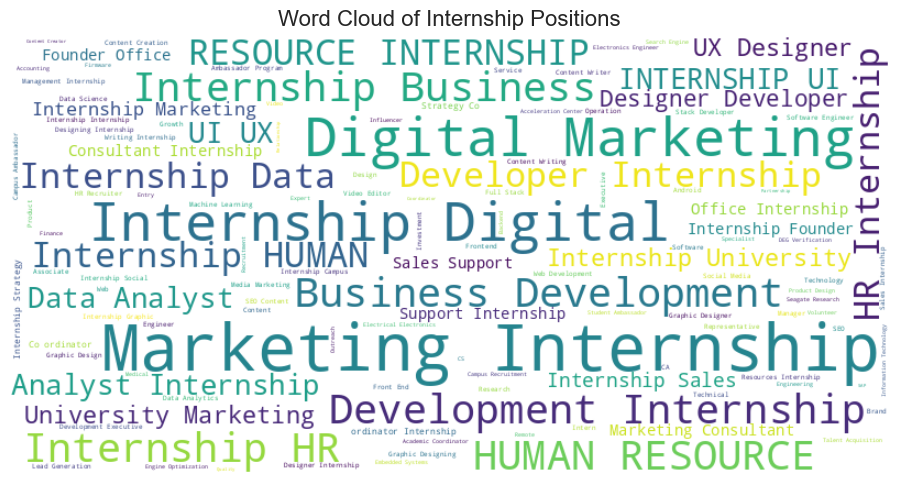

In [54]:
positions = ' '.join(data_cleaned['Position'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Internship Positions', fontsize=16)
plt.tight_layout()
plt.show()

**Visualization 7: Treemap for Company-wise Activity**





In [55]:

company_counts = data_cleaned['Company'].value_counts().head(15).reset_index()
company_counts.columns = ['Company', 'Post Count']

fig = px.treemap(
    company_counts,
    path=['Company'],
    values='Post Count',
    title="Treemap of Top 15 Companies by Internship Posts",
    color='Post Count',
    color_continuous_scale='Viridis',
    hover_data={'Post Count': True}
)

fig.update_traces(
    textinfo="label+value+percent entry",
    marker=dict(cornerradius=5)
)

fig.update_layout(
    title_font_size=16,
    margin=dict(t=50, l=25, r=25, b=25),
    template="plotly_white"
)

fig.show()


**Visualization 8: Bubble Chart for Impressions, Applications, and Deadline**

In [67]:


internship_Scraped_data = pd.read_csv('../scraped_internships.csv')
bubble_data = internship_Scraped_data[['Impressions', 'Applied', 'Application Deadline']].dropna()
bubble_data['Deadline (days)'] = pd.to_numeric(bubble_data['Application Deadline'], errors='coerce')

# Drop rows with NaN values in 'Deadline (days)'
bubble_data = bubble_data.dropna(subset=['Deadline (days)'])

fig = px.scatter(
    bubble_data,
    x='Impressions',
    y='Applied',
    size='Deadline (days)',
    color='Deadline (days)',
    hover_data=['Impressions', 'Applied', 'Deadline (days)'],
    title="Bubble Chart: Impressions vs Applications (Bubble Size: Deadline)",
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title="Impressions",
    yaxis_title="Applications",
    template="plotly_white",
    coloraxis_colorbar=dict(title="Deadline (days)")
)

fig.show()


**Visualization 9: Sunburst Chart for Eligibility Breakdown**

In [58]:
eligibility_hierarchy = data_cleaned['Eligibility'].str.split(', ', expand=True).stack().value_counts()
sunburst_data = pd.DataFrame({
    'Eligibility': eligibility_hierarchy.index,
    'Count': eligibility_hierarchy.values
})
fig = px.sunburst(
    sunburst_data, path=['Eligibility'], values='Count',
    color='Count', color_continuous_scale='viridis', title='Sunburst Chart of Eligibility Criteria'
)
fig.show()